In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Load the data
data = pd.read_csv('stloan_risk.csv')
data

,dependent_spouse,hmale,hage,dep_child,started_business,average_risk_attitude,above_average_risk_attitude,substantial_risk_attitude,college4,grad,ln_total_incomer,log_amt_loan_total_fin_w,amt_loan_total_fin_w,ln_new_worthr,log_share_risky_assets_3_w,share_risky_assets_3_w,ln_Rm_p4,vol_Rm_p4,aaa_diff
0,0,0,95,0,0,0,0,0,1,0,12.009950,-18.42068,0.00000,15.653550,-4.708237,0.009021,NaN,NaN,NaN
1,1,1,95,0,0,0,0,0,0,1,13.264150,-18.42068,0.00000,17.033760,-0.685547,0.503815,NaN,NaN,NaN
2,0,0,94,0,0,1,0,0,1,0,13.884080,-18.42068,0.00000,13.649240,-18.420680,0.000000,NaN,NaN,NaN
3,1,1,92,0,0,0,0,0,1,0,11.326850,-18.42068,0.00000,15.133960,-0.268464,0.764552,NaN,NaN,NaN
4,1,1,95,0,0,0,0,0,0,1,12.119590,-18.42068,0.00000,15.356800,-1.294923,0.273919,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,0,1,37,0,0,0,1,0,1,0,11.674340,-18.42068,0.00000,13.062900,-2.375473,0.092970,0.294978,6.183458,1.24
13990,0,0,25,0,0,0,0,0,1,0,9.749765,3.59980,36.59091,6.443879,-18.420680,0.000000,0.294978,6.183458,1.24
13991,1,1,37,2,0,1,0,0,0,1,11.794140,-18.42068,0.00000,10.667720,-18.420680,0.000000,0.294978,6.183458,1.24
13992,1,1,40,2,0,0,1,0,0,1,12.185870,-18.42068,0.00000,13.515420,-1.533501,0.215779,0.294978,6.183458,1.24


In [12]:
# remove the last 3 columns
data = data.iloc[:, :-3]
data

,dependent_spouse,hmale,hage,dep_child,started_business,average_risk_attitude,above_average_risk_attitude,substantial_risk_attitude,college4,grad,ln_total_incomer,log_amt_loan_total_fin_w,amt_loan_total_fin_w,ln_new_worthr,log_share_risky_assets_3_w,share_risky_assets_3_w
0,0,0,95,0,0,0,0,0,1,0,12.009950,-18.42068,0.00000,15.653550,-4.708237,0.009021
1,1,1,95,0,0,0,0,0,0,1,13.264150,-18.42068,0.00000,17.033760,-0.685547,0.503815
2,0,0,94,0,0,1,0,0,1,0,13.884080,-18.42068,0.00000,13.649240,-18.420680,0.000000
3,1,1,92,0,0,0,0,0,1,0,11.326850,-18.42068,0.00000,15.133960,-0.268464,0.764552
4,1,1,95,0,0,0,0,0,0,1,12.119590,-18.42068,0.00000,15.356800,-1.294923,0.273919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,0,1,37,0,0,0,1,0,1,0,11.674340,-18.42068,0.00000,13.062900,-2.375473,0.092970
13990,0,0,25,0,0,0,0,0,1,0,9.749765,3.59980,36.59091,6.443879,-18.420680,0.000000
13991,1,1,37,2,0,1,0,0,0,1,11.794140,-18.42068,0.00000,10.667720,-18.420680,0.000000
13992,1,1,40,2,0,0,1,0,0,1,12.185870,-18.42068,0.00000,13.515420,-1.533501,0.215779


In [13]:
# Check the data types
data.dtypes

dependent_spouse                 int64
hmale                            int64
hage                             int64
dep_child                        int64
started_business                 int64
average_risk_attitude            int64
above_average_risk_attitude      int64
substantial_risk_attitude        int64
college4                         int64
grad                             int64
ln_total_incomer               float64
log_amt_loan_total_fin_w       float64
amt_loan_total_fin_w           float64
ln_new_worthr                  float64
log_share_risky_assets_3_w     float64
share_risky_assets_3_w         float64
dtype: object

In [14]:
# describe the data
data.describe()

,dependent_spouse,hmale,hage,dep_child,started_business,average_risk_attitude,above_average_risk_attitude,substantial_risk_attitude,college4,grad,ln_total_incomer,log_amt_loan_total_fin_w,amt_loan_total_fin_w,ln_new_worthr,log_share_risky_assets_3_w,share_risky_assets_3_w
count,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13924.000000,13924.000000,13994.000000,13924.000000,13924.000000
mean,0.767972,0.876947,54.348578,0.714020,0.288695,0.485923,0.298842,0.067743,0.508218,0.491782,12.189373,-17.417553,0.273140,13.362735,-6.655341,0.269108
std,0.422142,0.328509,13.557619,1.115995,0.453172,0.499820,0.457767,0.251314,0.499950,0.499950,3.470175,4.137417,2.748072,5.531325,7.885333,0.299896
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.420680,-18.420680,0.000000,-19.436000,-18.420680,0.000000
25%,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.286030,-18.420680,0.000000,12.651912,-18.420680,0.000000
50%,1.000000,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.133410,-18.420680,0.000000,14.239105,-1.919472,0.146684
75%,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,13.510685,-18.420680,0.000000,16.004103,-0.721246,0.486146
max,1.000000,1.000000,95.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.628930,3.752231,42.616040,21.787150,-0.029947,0.970497


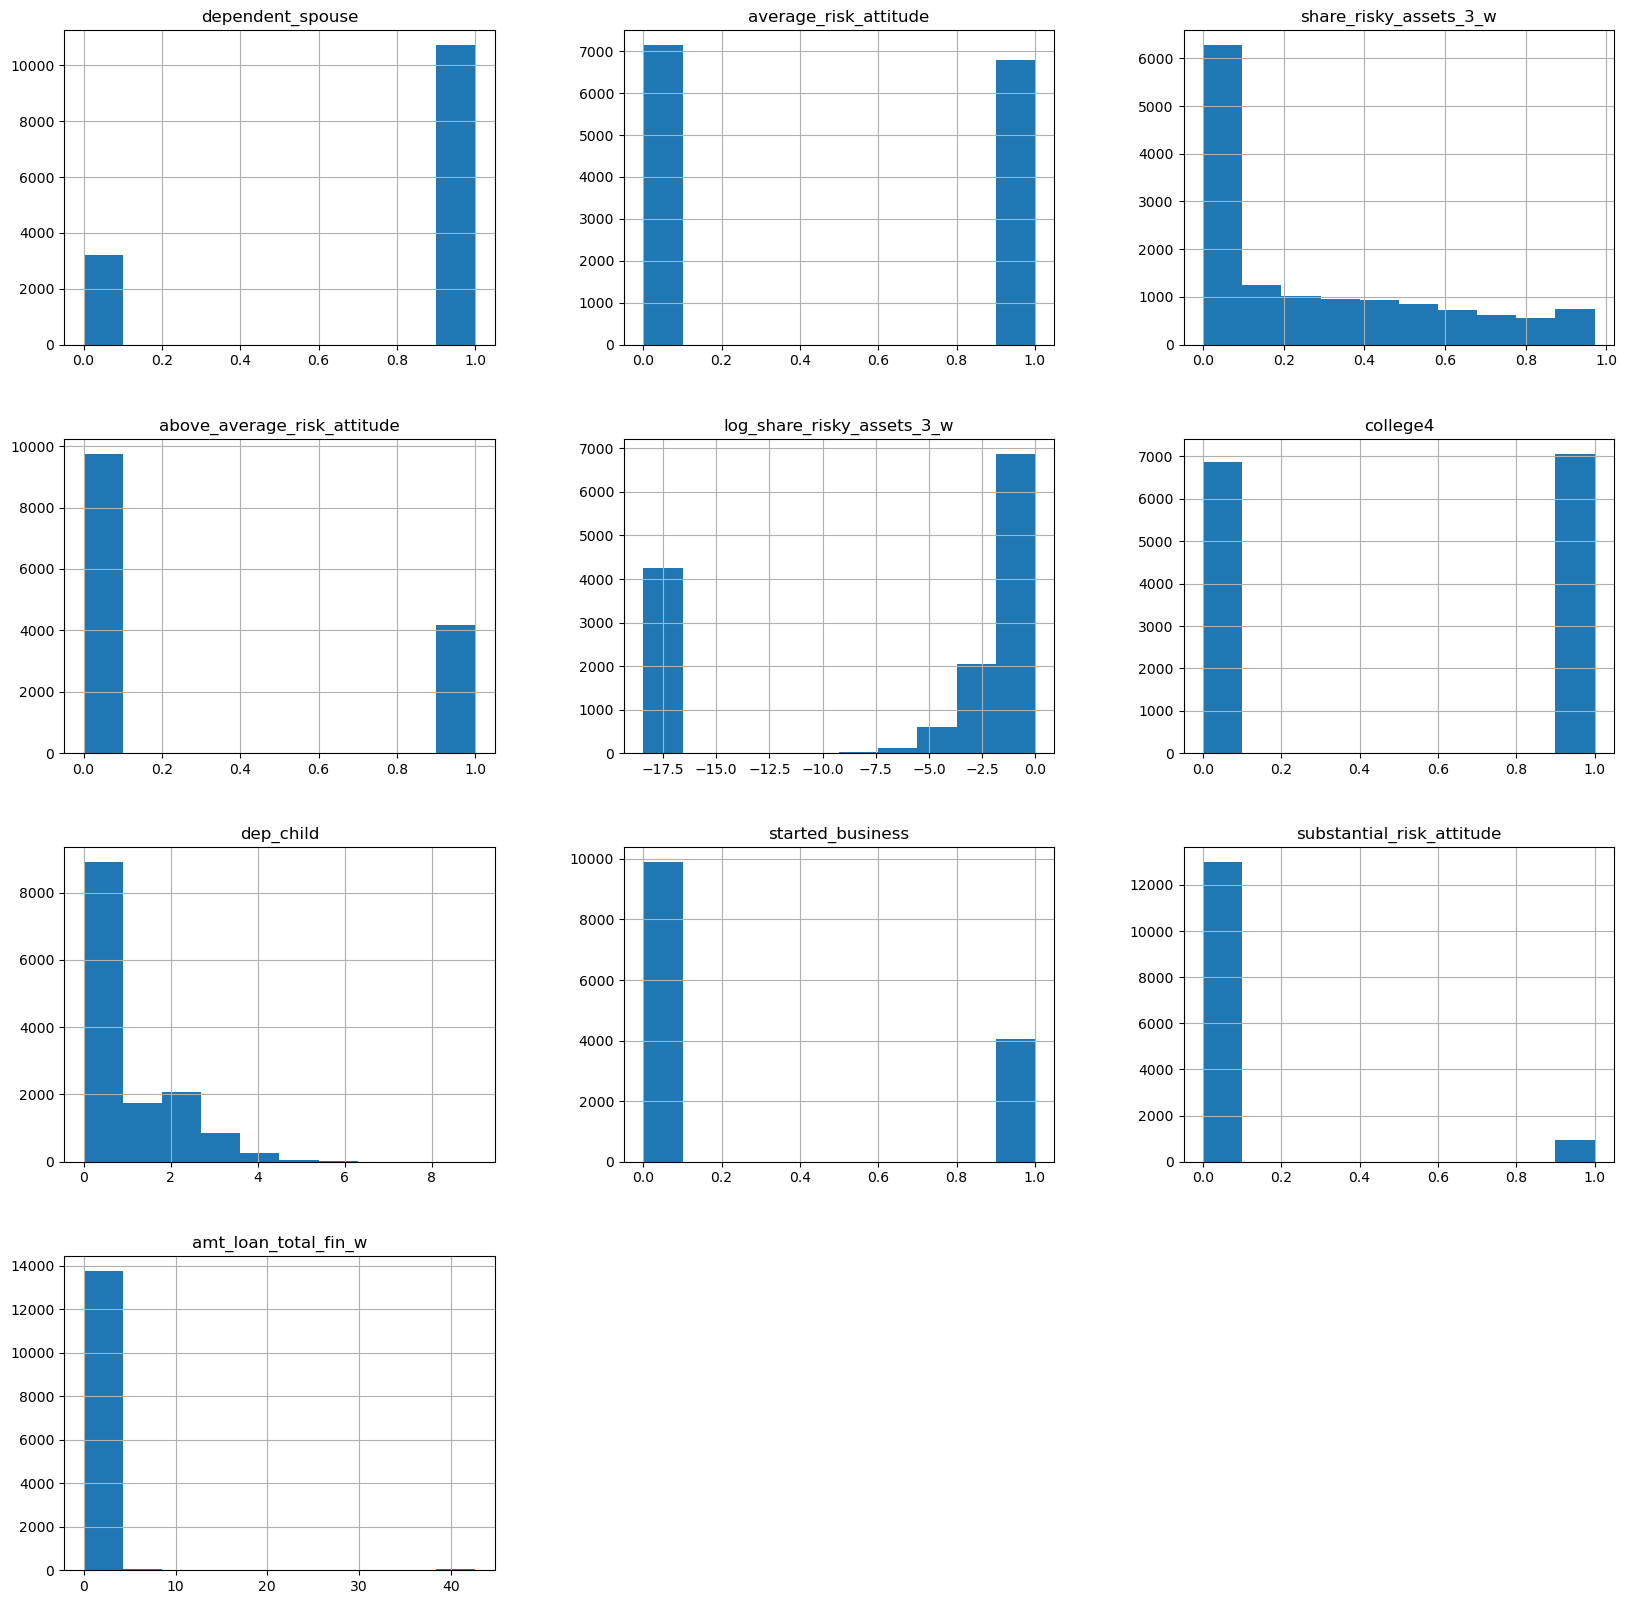

In [27]:
# plot the data

data.hist(figsize=(20, 20))
plt.show()

In [15]:
# Check for missing values
data.isnull().sum()

dependent_spouse                0
hmale                           0
hage                            0
dep_child                       0
started_business                0
average_risk_attitude           0
above_average_risk_attitude     0
substantial_risk_attitude       0
college4                        0
grad                            0
ln_total_incomer                0
log_amt_loan_total_fin_w       70
amt_loan_total_fin_w           70
ln_new_worthr                   0
log_share_risky_assets_3_w     70
share_risky_assets_3_w         70
dtype: int64

In [17]:
# remove the missing values
data = data.dropna()

In [18]:
# create a function to recursively calculate vif and drop the column with the highest vif until all vif are less than a threshold


def calculate_vif(data, threshold=5):
    vif = pd.DataFrame()
    vif['variables'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    if vif['VIF'].max() > threshold:
        data = data.drop(vif['variables'].values[0], axis=1)
        return calculate_vif(data)
    return vif

In [21]:
# run the function on the data and save the result
vif_result = calculate_vif(data)
vif_result

,variables,VIF
0,dependent_spouse,4.084962
3,average_risk_attitude,3.144365
9,share_risky_assets_3_w,2.597814
4,above_average_risk_attitude,2.401197
8,log_share_risky_assets_3_w,2.119473
6,college4,1.916298
1,dep_child,1.516075
2,started_business,1.459176
5,substantial_risk_attitude,1.335922
7,amt_loan_total_fin_w,1.029571


In [23]:
# edit the original dataframe to contain only the columns with vif less than 5
data = data[vif_result['variables'].values]
data

,dependent_spouse,average_risk_attitude,share_risky_assets_3_w,above_average_risk_attitude,log_share_risky_assets_3_w,college4,dep_child,started_business,substantial_risk_attitude,amt_loan_total_fin_w
0,0,0,0.009021,0,-4.708237,1,0,0,0,0.00000
1,1,0,0.503815,0,-0.685547,0,0,0,0,0.00000
2,0,1,0.000000,0,-18.420680,1,0,0,0,0.00000
3,1,0,0.764552,0,-0.268464,1,0,0,0,0.00000
4,1,0,0.273919,0,-1.294923,0,0,0,0,0.00000
...,...,...,...,...,...,...,...,...,...,...
13989,0,0,0.092970,1,-2.375473,1,0,0,0,0.00000
13990,0,0,0.000000,0,-18.420680,1,0,0,0,36.59091
13991,1,1,0.000000,0,-18.420680,0,2,0,0,0.00000
13992,1,0,0.215779,1,-1.533501,0,2,0,0,0.00000


In [28]:
# run ols regression on the data

y = data['share_risky_assets_3_w']
X = data.drop('share_risky_assets_3_w', axis=1)

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     share_risky_assets_3_w   R-squared:                       0.472
Model:                                OLS   Adj. R-squared:                  0.472
Method:                     Least Squares   F-statistic:                     1385.
Date:                    Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                            13:25:06   Log-Likelihood:                 1464.4
No. Observations:                   13924   AIC:                            -2909.
Df Residuals:                       13914   BIC:                            -2833.
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4624      0.007     66.440      0.000       0.449       0.476
dependent_spouse               -0.0174      0.005     -3.735      0.000      -0.027      -0.008
average_risk_attitude           0.0052      0.006      0.896      0.370      -0.006       0.016
above_average_risk_attitude     0.0056      0.006      0.896      0.370      -0.007       0.018
log_share_risky_assets_3_w      0.0262      0.000    104.442      0.000       0.026       0.027
college4                       -0.0004      0.004     -0.097      0.922      -0.008       0.007
dep_child                      -0.0116      0.002     -6.761      0.000      -0.015      -0.008
started_business               -0.0107      0.004     -2.577      0.010      -0.019      -0.003
substantial_risk_attitude       0.0272      0.009      3.093      0.002       0.010       0.045
amt_loan_total_fin_w            0.0008      0.001      1.248      0.212      -0.000       0.002
==============================================================================
Omnibus:                      424.545   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.173
Skew:                           0.417   Prob(JB):                     9.62e-97
Kurtosis:                       2.739   Cond. No.                         65.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

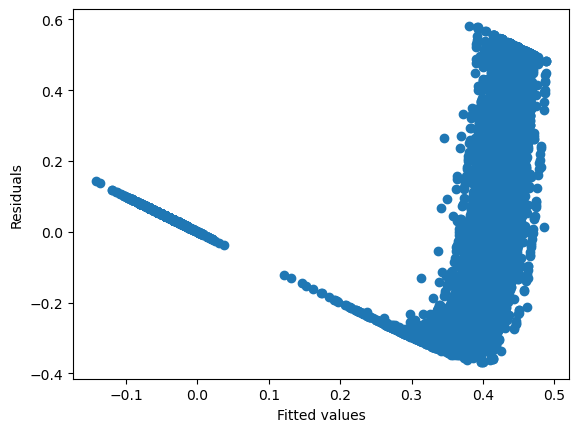

In [29]:
# plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()